# Bias vs Variance 

**Bias** is a measurement of how accurately a model can capture the pattern in a training dataset   
->Occurs when Train error is more    
->occurs in  underfit model   
->In underfit model, Variance is low and Bias is high.         

**Variance** occurs when there is a high test error            
->Test error varies greatly based on the selection of the training dataset        
->Occurs in overfit model             
->In overfit model, variance is high and Bias is low             

**Note:** In Balance fit, Variance and Bias are low           

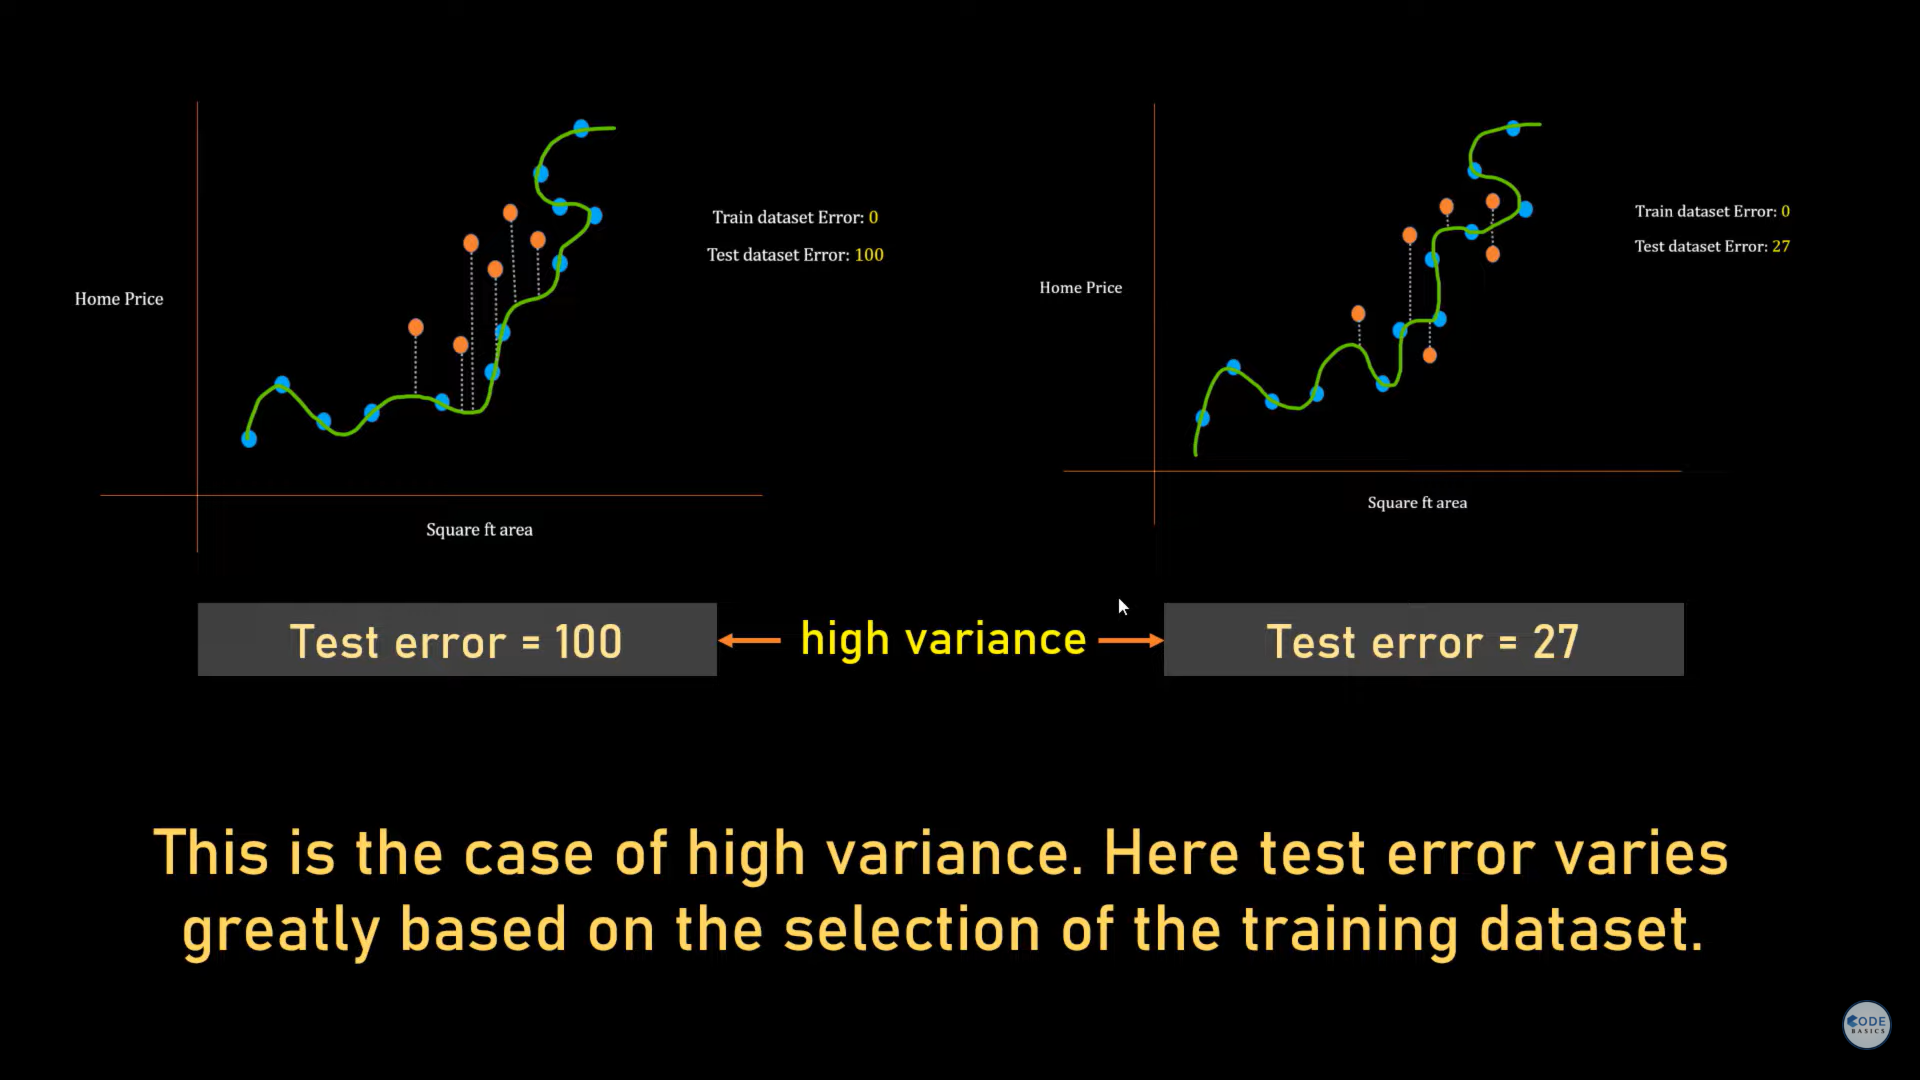

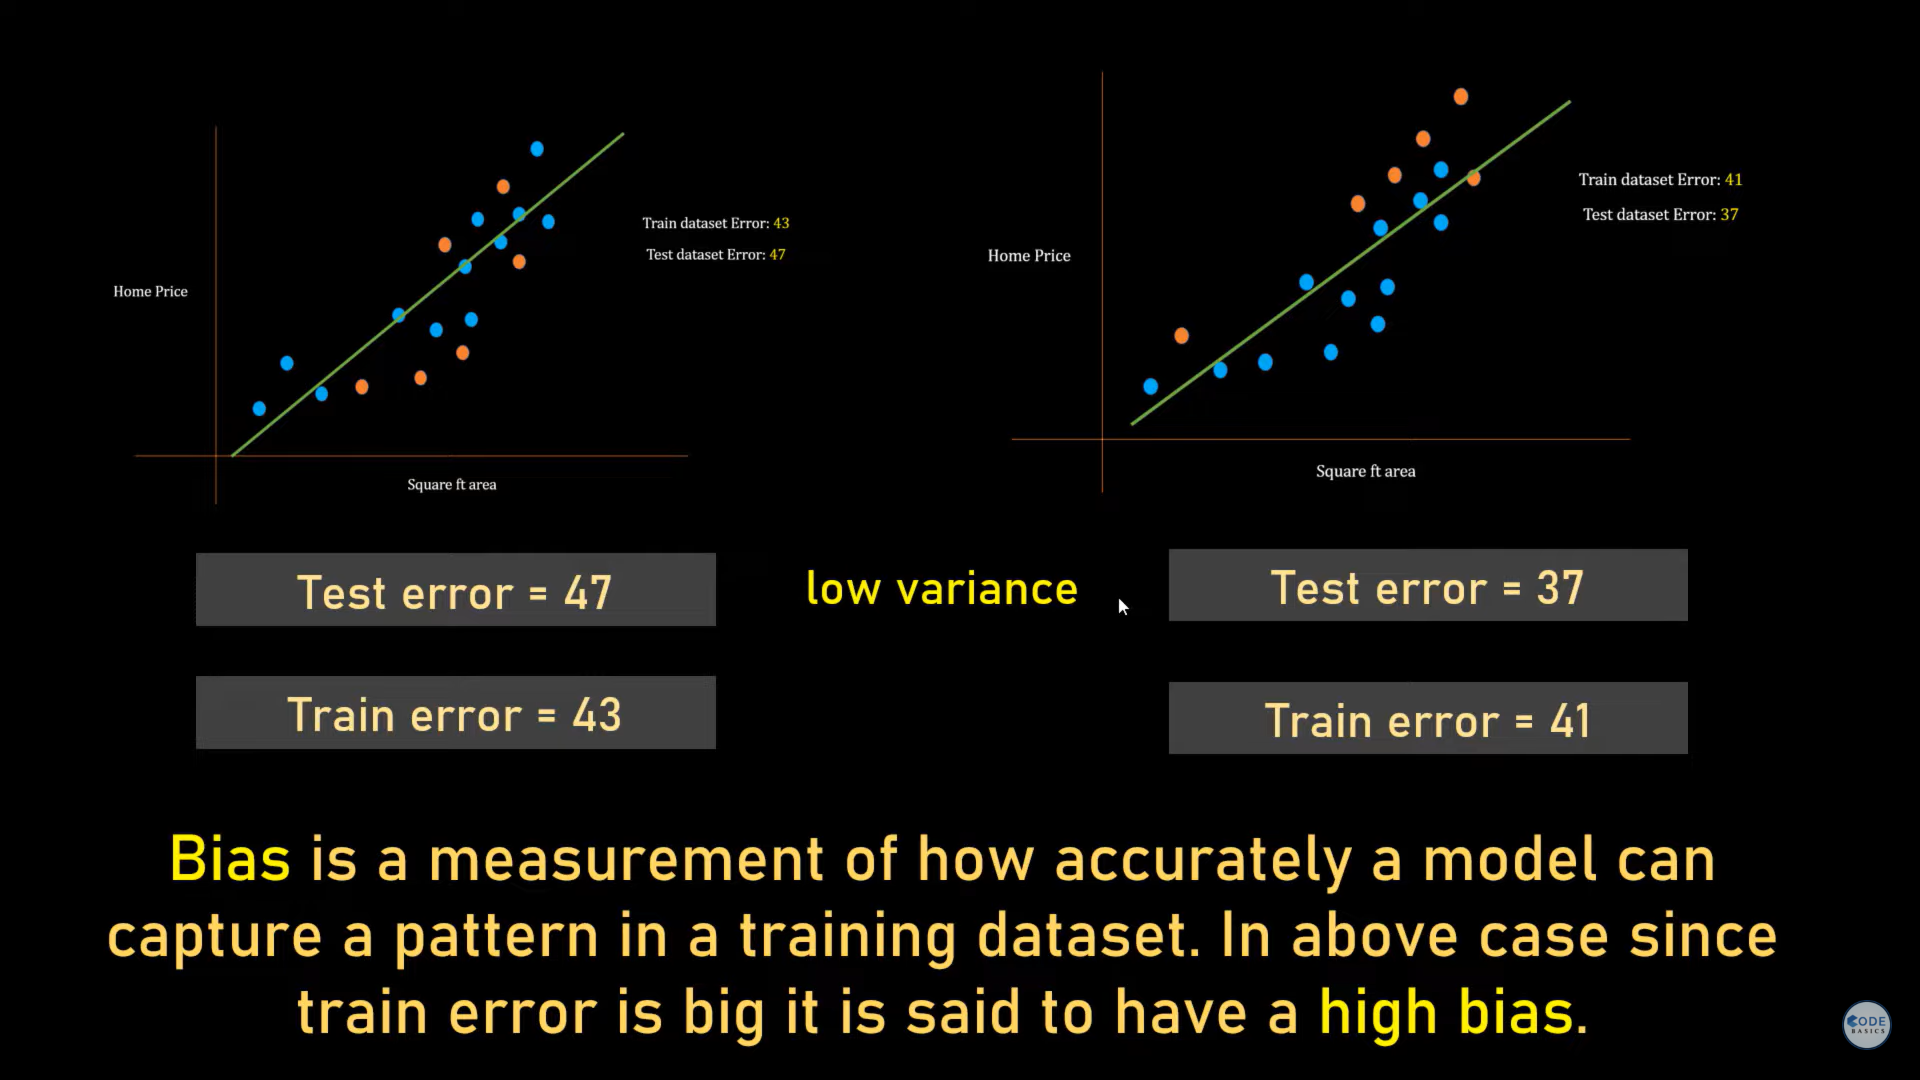

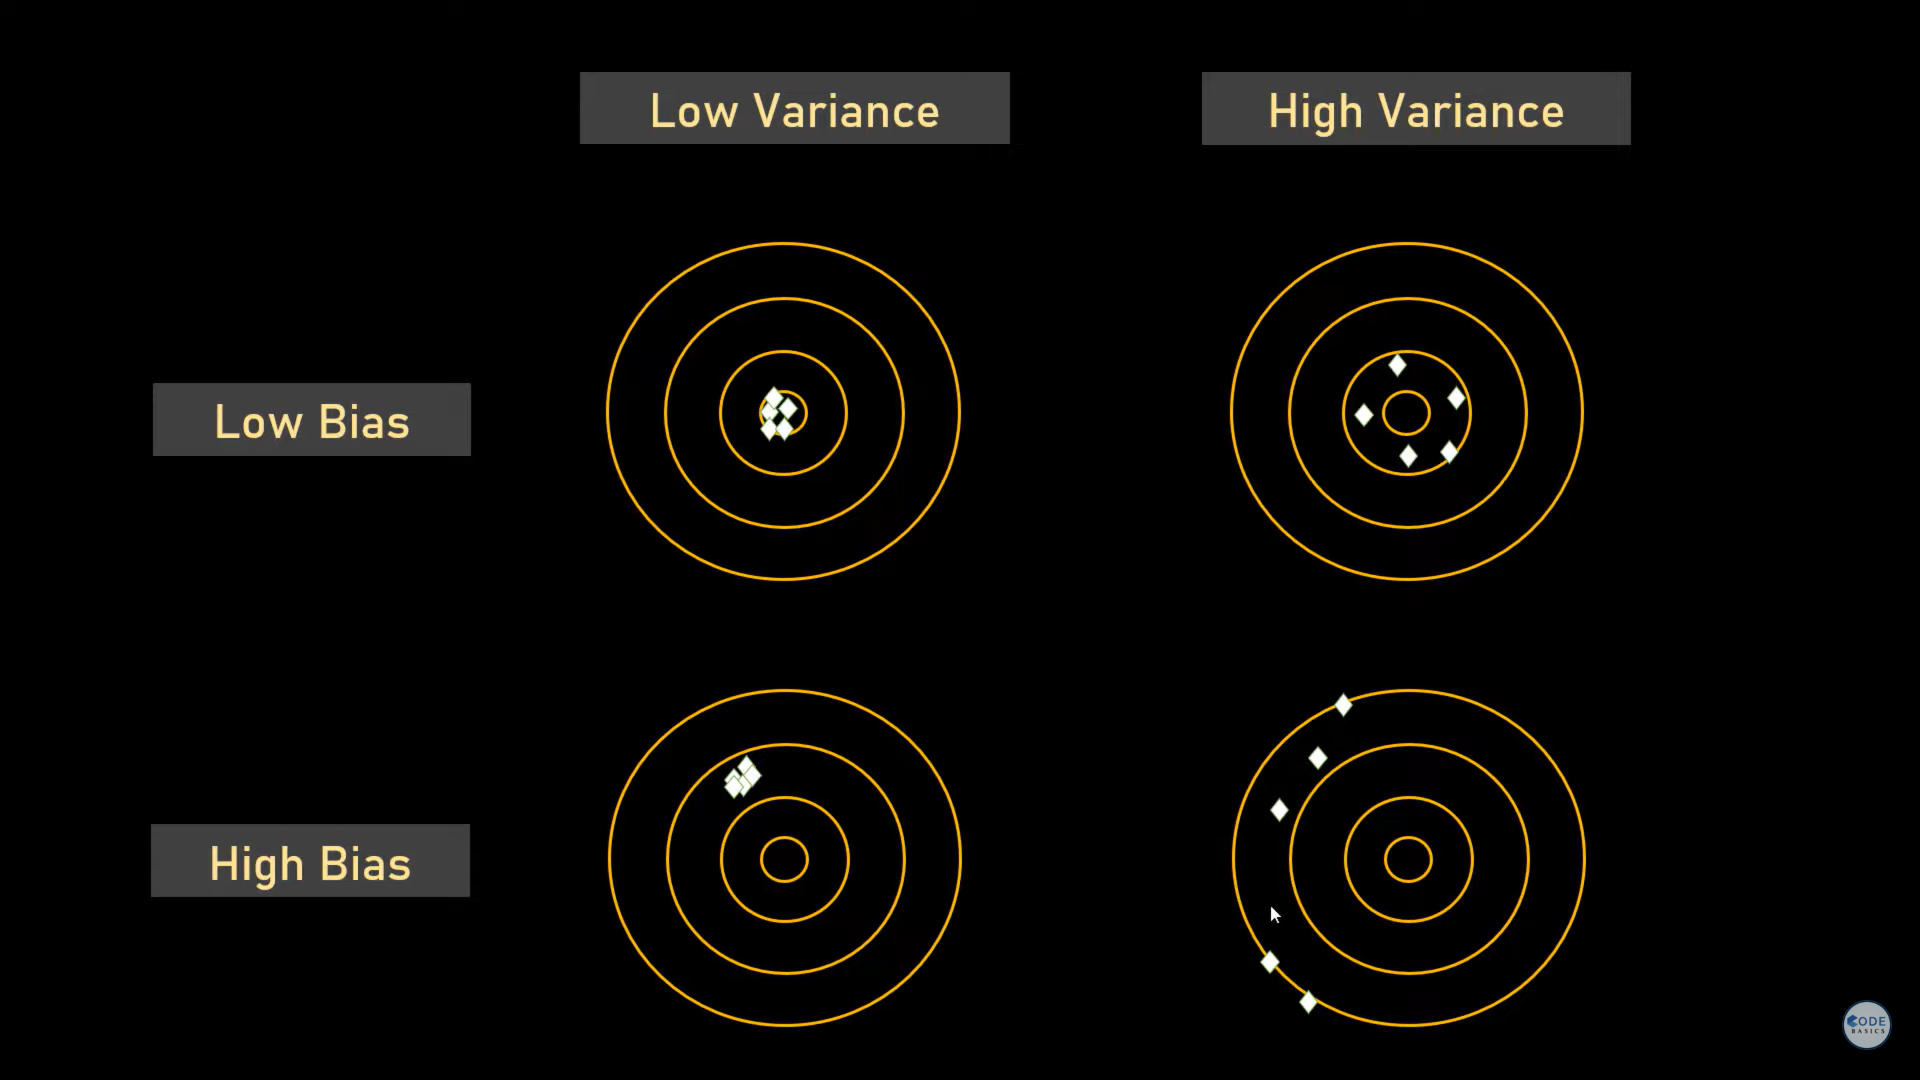

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [145]:
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [146]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Checking for null values**

In [147]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [148]:
def remove_outliers(data):
    for column in data.columns[:-1]:
        if data[column].dtype!='O':
            data=data[data[column]<=(data[column].mean()+3*data[column].std())]
    return data
result=remove_outliers(data)
result.shape

(727, 9)

In [149]:
data.shape

(768, 9)

**Apply Z score to remove outliers**

In [14]:
data[data.Pregnancies>(data.Pregnancies.mean()+3*data.Pregnancies.std())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [17]:
data1=data[data.Pregnancies<=(data.Pregnancies.mean()+3*data.Pregnancies.std())]
data1.shape

(764, 9)

In [18]:
data1[data1.Glucose>(data1.Glucose.mean()+3*data1.Glucose.std())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [19]:
data1[data1.BloodPressure>(data1.BloodPressure.mean()+3*data1.BloodPressure.std())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [31]:
data1[data1.SkinThickness>(data1.SkinThickness.mean()+3*data1.SkinThickness.std())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [32]:
data1=data1[data1.SkinThickness<=(data1.SkinThickness.mean()+3*data1.SkinThickness.std())]
data1.shape

(763, 9)

In [33]:
data1[data1.Insulin>(data1.Insulin.mean()+3*data1.Insulin.std())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
111,8,155,62,26,495,34.0,0.543,46,1
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
247,0,165,90,33,680,52.3,0.427,23,0
286,5,155,84,44,545,38.7,0.619,34,0
370,3,173,82,48,465,38.4,2.137,25,1


In [34]:
data2=data1[data1.Insulin<=(data1.Insulin.mean()+3*data1.Insulin.std())]
data2.shape

(745, 9)

In [25]:
data2[data2.BMI>(data2.BMI.mean()+3*data2.BMI.std())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,0,129,110,46,130,67.1,0.319,26,1
445,0,180,78,63,14,59.4,2.420,25,1
673,3,123,100,35,240,57.3,0.880,22,0


In [35]:
data2=data2[data2.BMI<=(data2.BMI.mean()+3*data2.BMI.std())]
data2.shape

(742, 9)

In [38]:
data3[data3.DiabetesPedigreeFunction>(data3.DiabetesPedigreeFunction.mean()+3*data3.DiabetesPedigreeFunction.std())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
12,10,139,80,0,0,27.1,1.441,57,0
45,0,180,66,39,0,42.0,1.893,25,1
58,0,146,82,0,0,40.5,1.781,44,0
330,8,118,72,19,0,23.1,1.476,46,0
371,0,118,64,23,89,0.0,1.731,21,0
395,2,127,58,24,275,27.7,1.600,25,0
593,2,82,52,22,115,28.5,1.699,25,0
621,2,92,76,20,0,24.2,1.698,28,0
622,6,183,94,0,0,40.8,1.461,45,0


In [40]:
data4=data3[data3.DiabetesPedigreeFunction<=(data3.DiabetesPedigreeFunction.mean()+3*data3.DiabetesPedigreeFunction.std())]
data4.shape

(733, 9)

In [42]:
data4[data4.Age>(data4.Age.mean()+3*data4.Age.std())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
453,2,119,0,0,0,19.6,0.832,72,0
459,9,134,74,33,60,25.9,0.460,81,0
666,4,145,82,18,0,32.5,0.235,70,1
684,5,136,82,0,0,0.0,0.640,69,0


In [43]:
data5=data4[data4.Age<=(data4.Age.mean()+3*data4.Age.std())]
data5.shape

(728, 9)

In [48]:
data5.Outcome.value_counts()

0    481
1    247
Name: Outcome, dtype: int64

In [49]:
247/481

0.5135135135135135

In [51]:
x=data5.drop('Outcome',axis=1)
y=data5.Outcome

**Scaling the values of x**

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.66424385,  0.91305544,  0.15829222, ...,  0.23599736,
         0.64617446,  1.51328869],
       [-0.85737202, -1.09290235, -0.15079156, ..., -0.69657286,
        -0.3481091 , -0.16798112],
       [ 1.2728902 ,  2.02747644, -0.25381949, ..., -1.1362131 ,
         0.80828591, -0.07949324],
       ...,
       [ 0.35992068,  0.05335925,  0.15829222, ..., -0.74986258,
        -0.72997163, -0.25646901],
       [-0.85737202,  0.21256225, -0.45987534, ..., -0.23028775,
        -0.35531405,  1.24782504],
       [-0.85737202, -0.83817755,  0.05526429, ..., -0.19032045,
        -0.47779826, -0.8758842 ]])

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,stratify=y,random_state=3)
x_train.shape

(582, 8)

In [61]:
y_train.value_counts()

0    385
1    197
Name: Outcome, dtype: int64

In [63]:
197/385 #y and y_train ratio is almost same and hence for this stratify= y is used

0.5116883116883116

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [67]:
cross_val_score(DecisionTreeClassifier(),x_scaled,y).mean()

0.7061313179026925

# Applying Bagging Classifier

In [70]:
from sklearn.ensemble import BaggingClassifier
bag_model=BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=3,
    oob_score=True,
    max_samples=0.8
)

In [71]:
bag_model.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=3)

In [72]:
bag_model.oob_score_

0.7457044673539519

In [75]:
cross_val_score(bag_model,x_train,y_train,cv=5).mean()

0.7473769525493663

We can see some improvement in test score with bagging classifier as compared to a standalone classifier

**Checking with Random Forest**

In [78]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=5)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [79]:
model.score(x_test,y_test)

0.7397260273972602

In [81]:
cross_val_score(RandomForestClassifier(),x_train,y_train,cv=5).mean()

0.7422929560860595

# Excercise

In [142]:
data=pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [127]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [128]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [129]:
data.shape

(918, 12)

In [110]:
col=data.columns
col=col.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','HeartDisease'])
col

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')

**Removing outliers**

In [132]:
def remove_outliers(data):
    for column in data.columns[:-1]:
        if data[column].dtype!='O':
            data=data[data[column]<=(data[column].mean()+3*data[column].std())]
    return data

In [133]:
data1=remove_outliers(data)
data1.shape

(894, 12)

In [150]:
data1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**converting text columns into integer**

In [162]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def apply_LabelEncoder(data):
    for column in data.columns:
        if data[column].dtype=="O":
            data[column]=le.fit_transform(data[column])
    return data

In [163]:
data2=apply_LabelEncoder(data1)
data2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [164]:
x=data2.drop('HeartDisease',axis=1)
y=data2.HeartDisease

**Scaling the values**

In [166]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [167]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,stratify=y,test_size=0.2,random_state=3)

**Support vector machine(SVM)**

In [173]:
from sklearn.svm import SVC
svm=SVC()

In [174]:
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.8547486033519553

In [175]:
cross_val_score(SVC(),x_train,y_train,cv=5).mean()

0.86993006993007

**svm using bagging classifier** 

In [177]:
bag_model=BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=10,
    oob_score=True,
    random_state=3,
    max_samples=0.8
)
cross_val_score(bag_model,x_scaled,y,cv=5).mean()

0.8321385977025925

**Using DecisionTreeClassifier**

In [182]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
cross_val_score(model,x_scaled,y,cv=5).mean()

0.7448371100370347

**DecisionTree using bagging classifier**

In [186]:
bag_model=BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=10,
    random_state=3,
    oob_score=True,
    max_samples=0.8
)
cross_val_score(bag_model,x_scaled,y,cv=5).mean()

0.811995480509698

**Random Forest**

In [188]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(),x_scaled,y,cv=5).mean()

0.8187119452639509

# Feature Engineering

Feature Engineering is the process of extracting useful features from the raw data using math, statistics and domain knowledge.   
1.Outlier detection  
2.Handling missing values  
3.One Hot encoding

# Outlier detection
using percentile

In [3]:
data=pd.read_csv(r"D:\programming languages\datasets\Bangalore_house_prices.csv")
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [5]:
#sample function will return given number of random rows
data.sample(15)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7548,Yelahanka,3 BHK,1620.0,3.0,90.00,3,5555
8314,Whitefield,3 BHK,1836.0,3.0,125.00,3,6808
8449,other,1 BHK,1000.0,1.0,19.00,1,1900
4730,Chandapura,2 BHK,975.0,2.0,24.86,2,2549
1971,other,3 BHK,1550.0,3.0,110.00,3,7096
6808,other,2 Bedroom,880.0,2.0,48.00,2,5454
4948,Raja Rajeshwari Nagar,2 BHK,1095.0,2.0,38.33,2,3500
9452,other,5 Bedroom,950.0,5.0,55.00,5,5789
9149,Bhoganhalli,3 BHK,1234.6,3.0,104.00,3,8423
6935,Hebbal Kempapura,3 BHK,1725.0,2.0,165.00,3,9565


In [6]:
data.shape

(13200, 7)

In [7]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [10]:
max_thresold=data.price_per_sqft.quantile(0.999)
max_thresold

50959.36200000098

In [21]:
#getting rows where price is below maximum thresold value
data1=data[data.price_per_sqft<max_thresold]
data1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [15]:
min_thresold=data.price_per_sqft.quantile(0.001)
min_thresold

1366.184

In [20]:
#getting rows where price is above minimum thresold value
data2=data[data.price_per_sqft>max_thresold]
data2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [19]:
#passing both min and max percentile in quantile 
max_thres,min_thres=data.price_per_sqft.quantile([0.999,0.001])
max_thres,min_thres

(50959.36200000098, 1366.184)

In [25]:
#removing min and max outliers
data3=data[(data.price_per_sqft<max_thres) & (data.price_per_sqft>min_thres)]
data3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


# Excercise

In [27]:
data=pd.read_csv(r"D:\programming languages\datasets\AB_NYC_2019.csv")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [33]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [42]:
min_thres,max_thres=data.price.quantile([0.005,0.995])
min_thres,max_thres

(26.0, 1000.0)

In [43]:
data[data.price>max_thres]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,2018-09-25,0.31,4,297
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,NaN,NaN,1,365
1105,468613,$ (Phone number hidden by Airbnb) weeks - room f,2325861,Cynthia,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,NaN,NaN,1,0
1480,664047,Lux 2Bed/2.5Bath Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77516,-73.98573,Entire home/apt,2000,30,59,2016-01-28,0.71,11,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48080,36074198,Luxury apartment 2 min to times square,203565865,Vinícius,Manhattan,SoHo,40.72060,-74.00023,Entire home/apt,1308,2,0,NaN,NaN,1,179
48304,36189195,Next to Times Square/Javits/MSG! Amazing 1BR!,270214015,Rogelio,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,NaN,NaN,1,222
48305,36189257,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,NaN,NaN,1,270
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,NaN,NaN,1,349


In [45]:
data[data.price<min_thres]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
957,375249,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,2019-05-26,0.92,1,226
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,NaN,NaN,4,137
3918,2431607,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,2019-06-06,1.22,3,258
3950,2459916,"$455 Cozy 1bd, BKLYN Sublet March",12577771,Victor,Brooklyn,Bedford-Stuyvesant,40.68948,-73.93528,Private room,18,1,0,NaN,NaN,1,0
4647,3258197,Large 1br Duplex in Heart of Upper East Side,16477306,Jeff,Manhattan,Upper East Side,40.76866,-73.95553,Entire home/apt,16,2,21,2019-06-30,1.69,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48312,36199363,Furnished room for rent in Bronx SINGLE FEMALE,272247972,Kadeen,Bronx,Olinville,40.88116,-73.86547,Shared room,25,90,0,NaN,NaN,1,190
48486,36280646,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,2019-07-07,1.00,1,322
48832,36450814,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,NaN,NaN,3,363
48867,36473044,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,NaN,NaN,6,338


In [47]:
data1=data[(data.price>min_thres)&(data.price<max_thres)]
data1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [49]:
data1.sample(15)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8869,6799118,2 Bedroom Apt. Available July 15 thru Sept. 1,35590273,Nikima,Brooklyn,Red Hook,40.67728,-74.00572,Entire home/apt,80,1,0,NaN,NaN,2,0
1571,713538,Chic Victorian private apartment in townhouse,3672774,Alison,Brooklyn,Clinton Hill,40.68341,-73.96060,Entire home/apt,175,1,363,2019-06-16,4.55,2,323
26974,21364872,"Williamsburg sunny bedroom, 15 mins to Manhattan",32527579,Alex,Brooklyn,Williamsburg,40.71239,-73.95857,Private room,70,4,8,2019-06-23,0.44,1,0
19635,15721376,Views ! - Unique penthouse in UWS,69652097,Michele,Manhattan,Upper West Side,40.80131,-73.97114,Entire home/apt,175,21,5,2019-06-24,0.19,1,0
25978,20744948,Cheap Large Bedroom w/WorkDesk- 10min to JFK/Mall,107455767,Guelma,Queens,Rosedale,40.65429,-73.73432,Private room,45,30,34,2019-05-14,1.52,5,90
44072,34020097,Cozy Room in Classic Crown Heights,98978751,Vita,Brooklyn,Crown Heights,40.67052,-73.95612,Private room,70,1,4,2019-06-18,2.67,1,153
24660,19812097,"Two B/Rm (2-3 guests) Near Beach, A/air train,...",139957134,Trudy,Queens,Arverne,40.59910,-73.79944,Private room,50,1,28,2019-06-22,1.23,3,251
7140,5192459,Quiet Room in 4BR UWS Brownstone,10677483,Greg,Manhattan,Upper West Side,40.80173,-73.96625,Private room,70,1,0,NaN,NaN,1,0
1662,753687,Mitchell Manor,3964655,Nicole,Brooklyn,Bedford-Stuyvesant,40.67958,-73.93687,Entire home/apt,125,3,104,2019-06-24,1.36,1,275
11126,8614790,Prime Park Slope apartment,45318624,Max,Brooklyn,Park Slope,40.67858,-73.97902,Entire home/apt,300,1,0,NaN,NaN,1,0


In [50]:
data1.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.834400e+04,4.834400e+04,48344.000000,48344.000000,48344.000000,48344.000000,48344.000000,38516.000000,48344.000000,48344.00000
mean,1.899531e+07,6.742602e+07,40.729023,-73.952159,140.861637,6.973813,23.421252,1.375218,7.185111,112.32517
std,1.098191e+07,7.851949e+07,0.054436,0.046043,112.869162,20.271106,44.725800,1.682123,33.120957,131.35183
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,27.000000,1.000000,0.000000,0.010000,1.000000,0.00000
25%,9.457281e+06,7.792454e+06,40.690170,-73.983010,69.000000,1.000000,1.000000,0.190000,1.000000,0.00000
50%,1.964134e+07,3.065628e+07,40.723070,-73.955660,105.000000,3.000000,5.000000,0.720000,1.000000,44.00000
75%,2.912896e+07,1.074344e+08,40.763153,-73.936340,175.000000,5.000000,24.000000,2.020000,2.000000,225.00000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,999.000000,1250.000000,629.000000,58.500000,327.000000,365.00000


**Removing Outliers using standard Deviation or Z score**

In [55]:
data=pd.read_csv("heights.csv")
data.sample(10)

,gender,height
2360,Male,64.682908
4353,Male,69.604027
9794,Female,63.783043
8378,Female,63.008725
2953,Male,71.006749
5828,Female,61.560609
6754,Female,65.318946
8601,Female,63.381808
4073,Male,68.509149
8854,Female,65.780625


In [56]:
data.shape

(10000, 2)

In [57]:
data.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


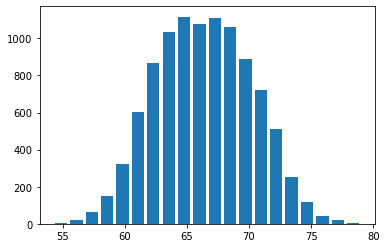

In [62]:
import matplotlib.pyplot as plt
plt.hist(data.height,bins=20,rwidth=0.8)
plt.show()

**Plot bell curve along with histogram for our dataset**

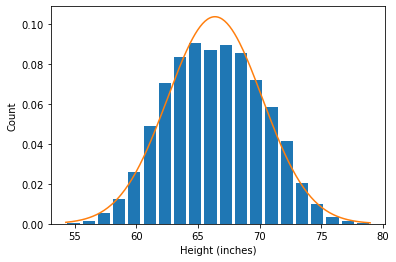

In [66]:
from scipy.stats import norm
import numpy as np
plt.hist(data.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(data.height.min(), data.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,data.height.mean(),data.height.std()))
plt.show()

In [67]:
data.height.mean()

66.3675597548656

In [68]:
data.height.std()

3.847528120795573

**Outlier detection and removal using 3 standard deviation**   
One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [71]:
upper_limit=data.height.mean()+3*data.height.std()
lower_limit=data.height.mean()-3*data.height.std()
lower_limit,upper_limit

(54.824975392478876, 77.91014411725232)

In [75]:
data[(data.height>upper_limit) | (data.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers

In [77]:
data1=data[(data.height>lower_limit)&(data.height<upper_limit)]
data1

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [80]:
data.shape[0]-data1.shape[0]#here outliers are removed

7

**Outlier detection and removal using Z Score**    

**Z score is a way to achieve same thing that we did above in part (1)   
Z score indicates how many standard deviation away a data point is.**

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

In [81]:
data['zscore'] = ( data.height - data.height.mean() ) / data.height.std()
data.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [82]:
data[data['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [83]:
data[data['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [84]:
data[(data.zscore<-3) | (data.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [86]:
data2=data[(data.zscore<=3)&(data.zscore>=-3)]
data2.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [89]:
data.shape[0]-data2.shape[0]

3207

**Removing outliers using IQR technique**   
IQR=Q3-Q1

In [90]:
data=pd.DataFrame([
("mohan",1.2),
("maria",2.3),
("sakib",4.9),
("tao",5.1),
("virat",5.2),
("khusbu",5.4),
("dmitry",5.5),
("selena",5.5),
("john",5.6),
("imran",5.6),
("jose",5.8),
("deepika",5.9),
("yoseph",6),
("binod",6.1),
("gulshan",6.2),
("johnson",6.5),
("donald",7.1),
("aamir",14.5),
("ken",23.2),
("Liu",40.2)
],columns=["name","height"])
data

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [91]:
data.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


In [93]:
Q1=data.height.quantile(0.25)
Q3=data.height.quantile(0.75)
Q1,Q3

(5.3500000000000005, 6.275)

In [94]:
IQR=Q3-Q1
IQR

0.9249999999999998

In [95]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(3.962500000000001, 7.6625)

In [96]:
data[(data.height<lower_limit)|(data.height>upper_limit)]

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


In [98]:
data1=data[(data.height>lower_limit)&(data.height<upper_limit)]
data1.head()

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5


# Excercise

In [100]:
data=pd.read_csv(r"D:\programming languages\datasets\heights_weights.csv")
data

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [101]:
data.describe()

,height,weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


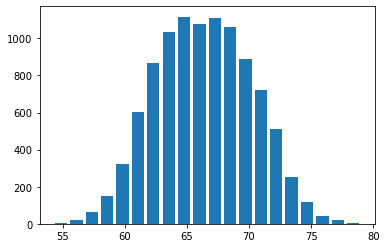

In [103]:
#histogram for heights
plt.hist(data.height,bins=20,rwidth=0.8)
plt.show()

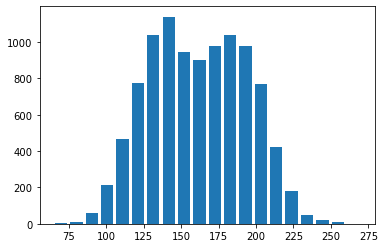

In [106]:
#Histogram for weight
plt.hist(data.weight,bins=20,rwidth=0.8)
plt.show()

In [108]:
height_IQR=data.height.quantile(0.75)-data.height.quantile(0.25)
weight_IQR=data.weight.quantile(0.75)-data.weight.quantile(0.25)
height_IQR,weight_IQR

(5.668641245615746, 51.35147356318197)

In [109]:
height_upper=data.height.quantile(0.25)+1.5*height_IQR
height_lower=data.height.quantile(0.25)-1.5*height_IQR
height_lower,height_upper

(55.00265861279534, 72.00858234964258)

In [111]:
data[(data.height>height_upper)|(data.height<height_lower)]

,gender,height,weight
0,Male,73.847017,241.893563
2,Male,74.110105,212.740856
16,Male,72.418317,196.028506
23,Male,75.205974,228.761781
27,Male,72.800844,206.828189
...,...,...,...
7294,Female,54.873728,78.606670
7311,Female,73.389586,190.078729
7856,Female,72.264748,188.437304
8635,Female,72.088712,192.530863


In [124]:
data1=data[(data.height<height_upper)&(data.height>height_lower)]
data1

,gender,height,weight
1,Male,68.781904,162.310473
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [125]:
weight_upper=data.weight.quantile(0.25)+1.5*weight_IQR
weight_lower=data.weight.quantile(0.25)-1.5*weight_IQR
weight_lower,weight_upper

(58.79084096072856, 212.84526165027447)

In [126]:
data1[(data1.weight>weight_upper)|(data1.weight<weight_lower)]

,gender,height,weight
3,Male,71.730978,220.042470
11,Male,71.640805,213.741169
119,Male,71.705763,223.299335
147,Male,71.001945,216.120095
229,Male,71.848435,218.157469
...,...,...,...
4656,Male,70.602409,216.511148
4742,Male,71.929340,215.049660
4813,Male,71.573778,215.297447
4836,Male,71.171153,213.457233


In [127]:
data2=data1[(data1.weight<weight_upper)&(data1.weight>weight_lower)]
data2

,gender,height,weight
1,Male,68.781904,162.310473
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


# Pearson's coefficient

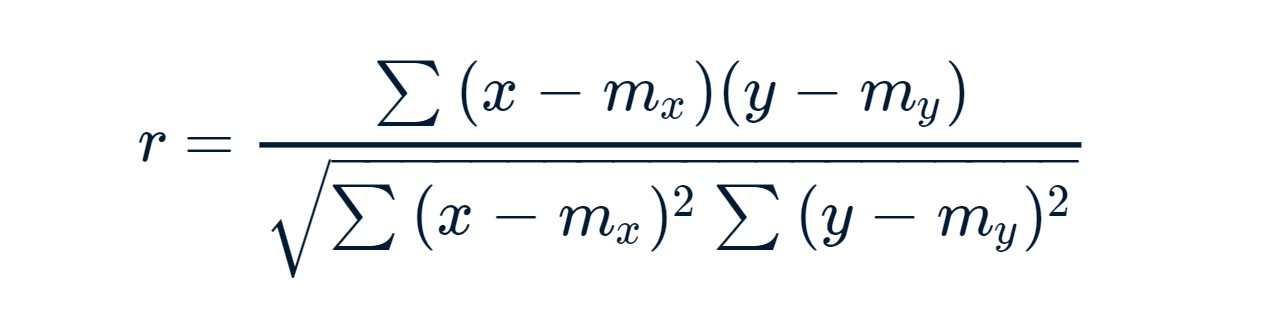

In [5]:
#manual method
import numpy as np
physics=[15,12,8,8,7,7,7,6,5,3]
history=[10,25,17,11,13,17,20,13,9,15]
phy=np.array(physics)
hist=np.array(history)
phy_mean=np.mean(phy)
hist_mean=np.mean(hist)
r=np.sum((phy-phy_mean)*(hist-hist_mean))/np.sqrt(np.sum(np.square((phy-phy_mean)))*np.sum(np.square((hist-hist_mean))))
r

0.14499815458068518

In [6]:
#using in built library
from scipy.stats import pearsonr
corr, _ = pearsonr(phy, hist)
corr,_

(0.14499815458068516, 0.6894014481166955)